In [2]:
import pandas as pd
import time
import matplotlib as plt
%matplotlib inline

fileName = "Vehicle Check/Northern Branch Phase II Debris Removal Ops.xlsx" # insert your file name here
df = pd.read_excel(fileName)

# TODO: variable for crews needed and property status
# our variables
status = ("Withdrawal", "Ineligible") # will use to take those properties out
# if we only need certain crews change as needed
# active_crews = ["CREW#101", "CREW#102", "CREW#203", "CREW#301", "CREW#404", "CREW#501", "CREW#406", "CREW#304",
#                 "CREW#701", "CREW#702", "CREW#703", "CREW#704", "CREW#705", "CREW#706",
#                 "CREW#707" "CREW#708", "CREW#801", "CREW#802", "CREW#803", "CREW#805"]

todaysDate = time.strftime("%m-%d-%y")
start_date = input("Put your start day in this format year-month-day (2021-05-01): ")
end_day = input("Put your end day in this format year-month-day (2021-06-19): ")

def mean_crew_days_on_property(df):
    # filter out withdrawals and ineligible properties and dates needed
    df = df.copy()


    df.loc[:, ['Debris Start', 'Debris Finish']] = df[(df.loc[:, 'Debris Start'] >= start_date) &
                                                      (df.loc[:, 'Debris Finish'] <= end_day)]
    df.loc[:,  "Structural Status"] = (~df.loc[:, "Structural Status"].isin(status))

    # AVG Days on Site from - finish day minus start day
    df.loc[:, "AVG Days on Site from: " + start_date + " to " + end_day] = df.loc[:, 'Debris Finish'] - df.loc[:, 'Debris Start']

    # convert AVG Days on Site from: " + start_date + " to " + end_day column to a float instead of timedelta64[ns]
    df["AVG Days on Site from: " + start_date + " to " + end_day] = df["AVG Days on Site from: " + start_date + " to " + end_day].dt.days

    # Filter columns we need
    df = df[['APN', "Structural Status", 'County', 'Debris Crew', 'Debris Crew WO#', 'Debris Start',
             'Debris Finish', "AVG Days on Site from: " + start_date + " to " + end_day]]

    # RE for filtering out the crew numbers from the rest of the text. Only way to get crews by group on this project(Northern Branch)
    df['Debris Crew WO#'] = df['Debris Crew WO#'].str.extract('(CREW ?# ?\d+)')

    # take out the spaces in 'Debris Crew WO#'
    df['Debris Crew WO#'] = df['Debris Crew WO#'].str.replace(" ", "")

    # use only active crews if needed. 
    # df.loc[:, 'Debris Crew WO#'] = df[df.loc[:, 'Debris Crew WO#'].isin(active_crews)]
    dffilt = df[['County', 'Debris Crew WO#', "AVG Days on Site from: " + start_date + " to " + end_day]]\
        .groupby(['County', 'Debris Crew WO#']).mean().round(2).fillna(0)
#     dffilt.to_excel("Mean days on property " + todaysDate + ".xlsx")
    
    
    
    
    
    #practice graphing
#     dffilt2 = df.groupby(['County']).mean().round(2)
#     dffilt2.plot(kind='bar', figsize=(20,12))
    
    

    return df[['County', 'Debris Crew WO#', "AVG Days on Site from: " + start_date + " to " + end_day]]\
        .groupby(['County','Debris Crew WO#']).mean().round(2).fillna(0)
    


total = mean_crew_days_on_property(df)
total

Put your start day in this format year-month-day (2021-05-01): 2021-05-01
Put your end day in this format year-month-day (2021-06-19): 2021-08-12


AVG Days on Site from: 2021-05-01 to 2021-08-12
County   Debris Crew WO#                                                 
Butte    CREW#101                                                    2.15
         CREW#102                                                    3.35
         CREW#201                                                    2.12
         CREW#202                                                    2.00
         CREW#203                                                    3.88
         CREW#301                                                    2.58
         CREW#303                                                    1.45
         CREW#304                                                    2.47
         CREW#404                                                    2.94
         CREW#405                                                    4.18
         CREW#406                                                    1.94
         CREW#407                                                    3.10
         CREW#501                                                    3.14
         CREW#502                                                    1.94
         CREW#503                                                    1.90
         CREW#504                                                    2.06
         CREW#705                                                    3.00
         CREW#900                                                    2.69
Lassen   CREW#406                                                    1.00
Nevada   CREW#304                                                    4.00
         CREW#900                                                    0.00
Plumas   CREW#406                                                    2.50
Shasta   CREW#405                                                    0.00
         CREW#502                                                    0.00
         CREW#601                                                    0.00
         CREW#602                                                    0.00
         CREW#603                                                    0.00
         CREW#604                                                    0.00
         CREW#605                                                    1.00
         CREW#606                                                    0.00
Siskiyou CREW#702                                                    1.00
         CREW#801                                                    3.96
         CREW#802                                                    1.78
         CREW#803                                                    2.37
         CREW#804                                                    1.83
         CREW#805                                                    2.00
         CREW#806                                                    1.90
Trinity  CREW#203                                                    2.00
         CREW#701                                                    3.07
         CREW#702                                                    2.47
         CREW#703                                                    3.38
         CREW#704                                                    2.88
         CREW#705                                                    1.20
         CREW#706                                                    1.67
Yuba     CREW#900                                                    0.00

<AxesSubplot:xlabel='County,Debris Crew WO#'>

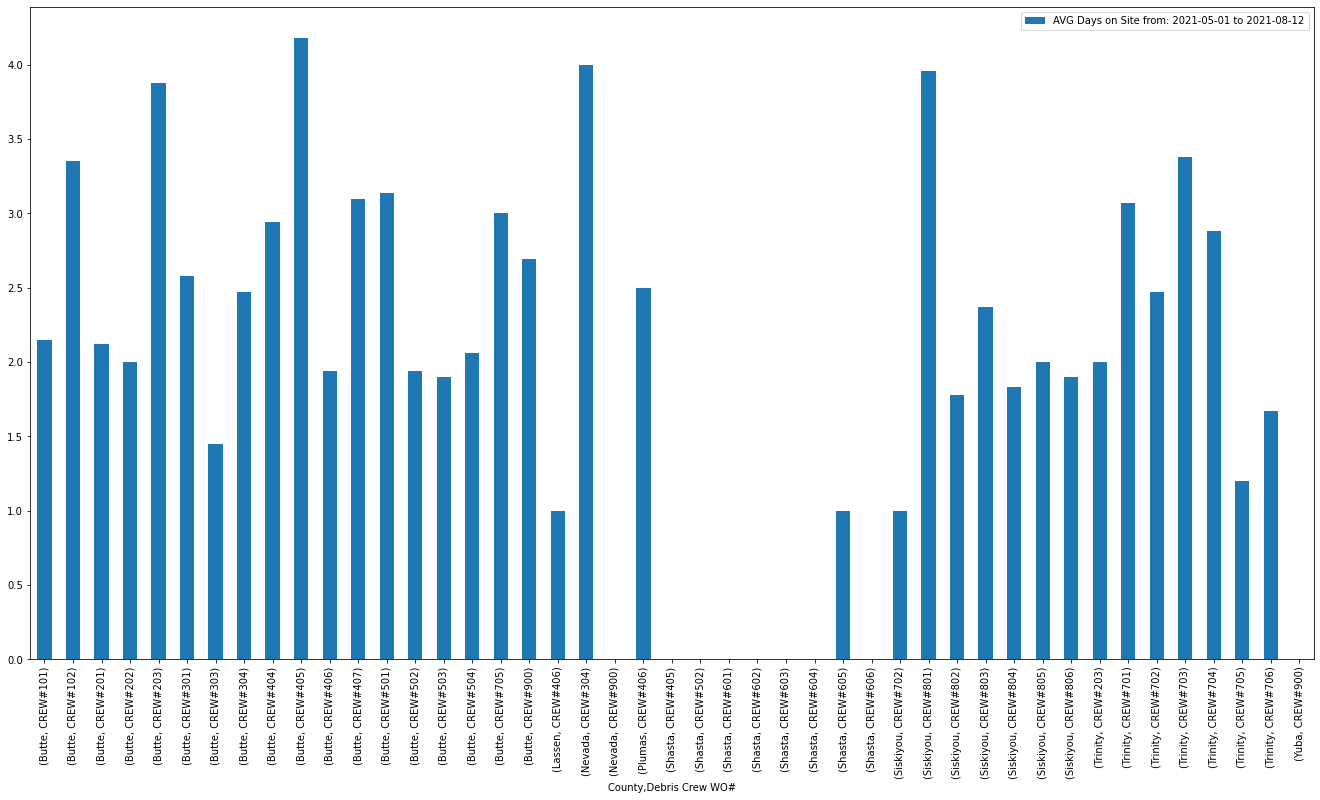

In [3]:
total.plot(kind='bar', figsize=(23,12))